In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from TPE import train_best_dgm_model, train_best_mim_model
from main import train_heat
import optuna

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
spatial_dims = 1

In [ ]:
best_heat_dgm = optuna.load_study(study_name=f"DGM Heat {spatial_dims}D", storage="sqlite:///dgm_heat.db")
dgm, dgm_best_loss, dgm_stats = train_best_dgm_model(best_heat_dgm, spatial_dims, 5000)
dgm_stats

In [ ]:
best_heat_mim = optuna.load_study(study_name=f"MIM Heat {spatial_dims}D", storage="sqlite:///mim_heat.db")
mim, mim_best_loss, mim_stats = train_best_mim_model(best_heat_mim, spatial_dims, 300)
mim_stats

In [2]:
mim, dgm = train_heat(spatial_dims)

Training:   0%|          | 0/150 [00:00<?, ?it/s]

Training model with 1.67e+05 params for 150 epochs


Training:  67%|██████▋   | 101/150 [00:10<00:05,  9.67it/s, loss=9.86e-02, val_loss=7.77e-02, best_val_loss=7.77e-02, mean=9.94e-02, std=6.99e-01, lr=6.25e-06, l0=9.50e-02, l1=0.00e+00, l2=3.62e-03, l3=0.00e+00, l4=0.00e+00]

First loss: 0.25297582149505615, 100th loss: 0.06782125681638718, diff: -1.85e-01, % diff: -73.19%


Training: 100%|██████████| 150/150 [00:15<00:00,  9.78it/s, loss=1.50e-01, val_loss=7.68e-02, best_val_loss=7.68e-02, mean=1.02e-01, std=6.99e-01, lr=1.56e-06, l0=1.46e-01, l1=0.00e+00, l2=3.45e-03, l3=0.00e+00, l4=0.00e+00]


DGM best loss: 0.07679770141839981, stats: {'mean': 0.10242078453302383, 'std': 0.6987380981445312, 'max': 1.1959803104400635, 'min': -0.9949624538421631, 'abs_mean': 0.6270434856414795}


Training:   1%|          | 1/150 [00:00<00:19,  7.67it/s, loss=2.43e-01, val_loss=1.53e-01, best_val_loss=inf, mean=-7.49e-03, std=7.06e-01, lr=1.00e-04, l0=2.43e-01, l1=1.16e-05, l2=0.00e+00, l3=0.00e+00]

Training model with 1.15e+05 params for 150 epochs


Training:  69%|██████▊   | 103/150 [00:06<00:03, 14.69it/s, loss=9.08e-02, val_loss=8.13e-02, best_val_loss=8.13e-02, mean=1.22e-01, std=7.03e-01, lr=6.25e-06, l0=8.88e-02, l1=2.01e-03, l2=0.00e+00, l3=0.00e+00]

First loss: 0.2425365000963211, 100th loss: 0.0677839070558548, diff: -1.75e-01, % diff: -72.05%


Training: 100%|██████████| 150/150 [00:10<00:00, 14.68it/s, loss=1.58e-01, val_loss=8.05e-02, best_val_loss=8.05e-02, mean=1.25e-01, std=7.03e-01, lr=1.56e-06, l0=1.56e-01, l1=2.04e-03, l2=0.00e+00, l3=0.00e+00]

MIM best loss: 0.08051083236932755, stats: {'mean': 0.12463033199310303, 'std': 0.7028849720954895, 'max': 1.1804969310760498, 'min': -0.9977121949195862, 'abs_mean': 0.6401985287666321}


In [3]:
def gen_heat_ani(model, grid_size=1000, n_time_steps=100):
    # Define the grid size and spatial coordinates
    x = np.linspace(0, 1, grid_size)
    grid_points = x.reshape(-1, 1)
    # Convert spatial grid to torch tensor
    grid_tensor = torch.tensor(grid_points).float().to(DEVICE)
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    line, = ax.plot(x, np.zeros(grid_size), lw=2)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("x")
    ax.set_ylabel("Temperature")
    ax.set_title("Stochastic Heat Equation Evolution")
    # Animation function
    def animate(t):
        time_tensor = torch.tensor(t).float().repeat(grid_size, 1).to(DEVICE)
        with torch.no_grad():
            output = model(grid_tensor, time_tensor)
            if isinstance(output, tuple):
                output = output[0]
        solution = output.cpu().numpy().flatten()
        line.set_ydata(solution)
        ax.set_title(f"Stochastic Heat Equation Solution at time t={t:.2f}\nwith mean {solution.mean():.2f} and std {solution.std():.2e}")
    # Create animation, range can be adjusted to cover desired time steps
    time_steps = np.linspace(0, 1, n_time_steps)  # For example, from t=0 to t=1
    ani = FuncAnimation(fig, animate, frames=time_steps, interval=50)
    return ani


MovieWriter imagemagick unavailable; using Pillow instead.


DGM Heat Equation Animation


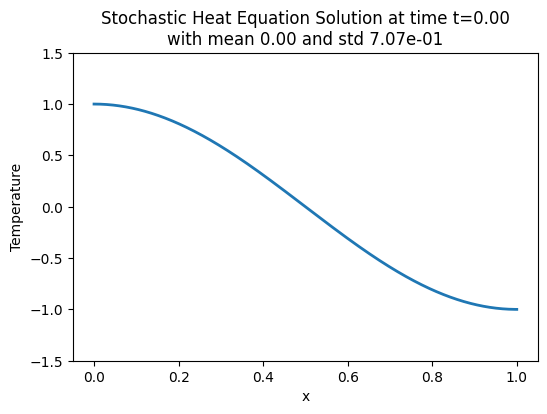

In [4]:
dgm_heat_ani = gen_heat_ani(dgm)
dgm_heat_ani.save("dgm_heat_ani.gif", writer="imagemagick", fps=10)
print("DGM Heat Equation Animation")
# HTML(dgm_heat_ani.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


MIM Heat Equation Animation


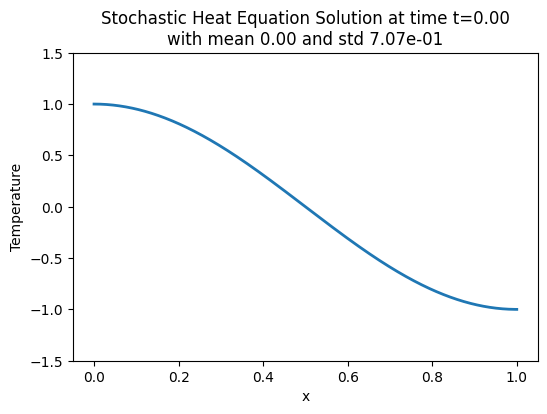

In [5]:
mim_heat_ani = gen_heat_ani(mim)
mim_heat_ani.save("mim_heat_ani.gif", writer="imagemagick", fps=10)
print("MIM Heat Equation Animation")
# HTML(mim_heat_ani.to_jshtml())